# Doing this every time to initialize

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
import os
np.random.seed(1) #to have reproducible results 
pd.set_option('display.max_colwidth', None)

Mounted at /content/drive


In [ ]:
paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/VeryMildDemented*/*.jpg',recursive=True)
paths1 = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/MildDemented*/*.jpg',recursive=True)
paths2 = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/ModerateDemented*/*.jpg',recursive=True)
paths3 = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/NonDemented*/*.jpg',recursive=True)
paths4 = glob.glob('/content/drive/MyDrive/Colab Notebooks/dementia/lewy body_resized*/*.jpg',recursive=True)
print('Very Mild Demented:',len(paths))
print('Mild Demented:',len(paths1))
print('Moderate Demented:',len(paths2))
print('None Demented:',len(paths3))
print('Lewy Body:',len(paths4))

In [57]:
paths6 = glob.glob('/content/drive/MyDrive/Colab Notebooks/augmented/frontotemporal dementia*/*.png',recursive=True)
print('Frontotemporal Dementia:', len(paths6))

Frontotemporal Dementia: 2064


In [4]:
paths7 = glob.glob('/content/drive/MyDrive/Colab Notebooks/dementia/vascular_dementia*/*.jpg',recursive=True)
print('vascular dementia:', len(paths7))

vascular dementia: 36


#did it once to resize images and save them

In [ ]:
def resize_image(src_img, size=(208,176), bg_color="black"): 
    src_img.thumbnail(size, Image.ANTIALIAS)
    new_image = Image.new("L", size, bg_color)
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
    return new_image
array = []
size = (176,208)
background_color="black"
for image in paths7:
  img = Image.open(image)
  new_image = resize_image(img, size, background_color)
  new_image = new_image.convert("L")
  array.append(new_image)
array

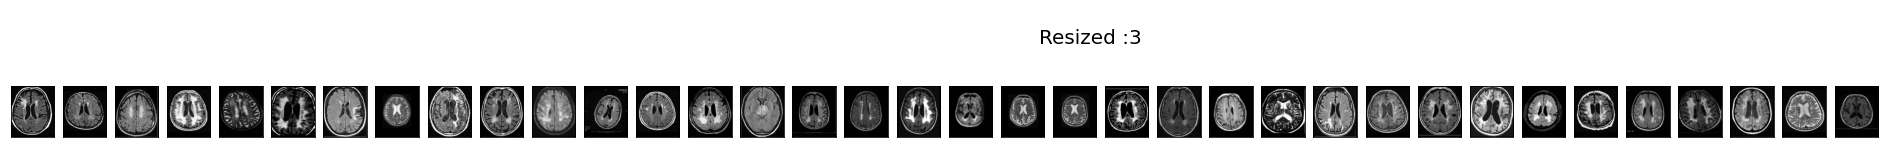

In [9]:
i = 0
img_array = []
plt.figure(figsize=(40,8))
for item in array:
  # image = Image.open(item)
  #new_image = image.resize((176, 208))
  #img_array = np.array(new_image)
  plt.subplot(4, 43, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)    
  plt.imshow(item, cmap = 'gray')
  i += 1
plt.suptitle("\nResized :3", fontsize=20)
plt.show()

In [10]:
for i, image in tqdm(enumerate(array)):
    directory = paths7[i].rsplit('/', 3)[0] + '/resized/' + paths7[i].rsplit('/', 2)[1]+ '/'
    os.makedirs(directory, exist_ok = True)
    image.save(directory + paths7[i].rsplit('/', 2)[2])
  #image = Image.open('/content/drive/MyDrive/Colab Notebooks/dementia/frontotemporal dementia*/*.png')
  # new_image = resize_image(img, size, background_color)
  # new_image = new_image.convert("L")
  #new_image.save('/content/drive/MyDrive/Colab Notebooks/dementia/frontotemporal dementia resized/.png')

0it [00:00, ?it/s]


#did it once to rename files


In [5]:
# Function to rename multiple files
def main():
    folder = ('/content/drive/MyDrive/Colab Notebooks/resized/frontotemporal dementia/')
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"FD_R {str(count)}.png"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
        # rename() function will
        # rename all the files
        os.rename(src, dst)
main()

# doing this every time to initialize 

In [ ]:
original = np.array([np.asarray(Image.open(img)) for img in paths])
print(original.shape)
mild = np.array([np.asarray(Image.open(img)) for img in paths1])
print(mild.shape)
moderate = np.array([np.asarray(Image.open(img)) for img in paths2])
print(moderate.shape)

In [ ]:
none = np.array([np.asarray(Image.open(img)) for img in paths3])
print(none.shape)

(3200, 208, 176)


In [ ]:
lewy = np.array([np.asarray(Image.open(img)) for img in paths4])
print(lewy.shape)

(5, 208, 176)


In [59]:
lewy1 = np.array([np.asarray(Image.open(img)) for img in paths5])
lewy1.shape

(100, 208, 176)

In [ ]:
FD_R = np.array([np.asarray(Image.open(img)) for img in paths6])
FD_R.shape

(2064, 208, 176)

In [83]:
paths8 = glob.glob('/content/drive/MyDrive/Colab Notebooks/augmented/vascular_dementia*/*.jpg',recursive=True)

In [84]:
Vascular = np.array([np.asarray(Image.open(img)) for img in paths8])
Vascular.shape

(4032, 208, 176)

# Augmentetion and saving images

In [ ]:
contrast1 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in mild]
brightness1 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast1]
sharpness1 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness1]
color1 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness1]
flip1 = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color1]
rotate1 = [Image.fromarray(img).rotate(np.random.choice([0, 90, 180, 270])) for img in flip1]
plt.figure(figsize=(15,15))
i = 0
for img in rotate1[0:30]:
    plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap='gray')
    i += 1
plt.suptitle("\nSmth is different now", fontsize=30)
plt.show()

In [ ]:
contrast3 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in none]
brightness3 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast3]
sharpness3 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness3]
color3 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness3]
flip3 = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color3]
rotate3 = [Image.fromarray(img).rotate(np.random.choice([0, 90, 180, 270])) for img in flip3]
plt.figure(figsize=(15,15))
i = 0
for img in rotate3[0:30]:
    plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap='gray')
    i += 1
plt.suptitle("\nSmth is different now", fontsize=30)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
contrast_lewy = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 3, 9)))) for img in lewy]
plt.figure(figsize=(9,9))
contrast_lewy = [Image.fromarray(img) for img in contrast_lewy]
i = 0
for img in contrast_lewy[0:5]:
    plt.subplot(5, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap='gray')
    i += 1
plt.suptitle("\nSmth is different now", fontsize=15)
plt.show()

In [ ]:
def contrast(FD_R):
  changed_FD = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 1.5, 1)))) for img in FD_R]
  brightness_FD = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 2, 2)))) for img in changed_FD]
  rotate_FD = [np.asarray(Image.fromarray(img).rotate(np.random.choice([0, 90, 180, 270]))) for img in brightness_FD]
  color_FD = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 1, 1)))) for img in rotate_FD]
  sharpness_FD = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(2, 1, 2)))) for img in color_FD]
  contrast_FD_1 = [np.asarray(ImageEnhance.Sharpness(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 1, 1)))) for img in sharpness_FD]
  flip_FD = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in contrast_FD_1]
  def save(changed_FD):
    changed_FD = [Image.fromarray(img) for img in flip_FD]
    for i, image in tqdm(enumerate(changed_FD)):
      directory = paths6[i].rsplit('/', 3)[0] + '/augmented/' + paths6[i].rsplit('/', 2)[1]+ '/' + '11.'
      os.makedirs(directory, exist_ok = True)
      image.save(directory + paths6[i].rsplit('/', 2)[2])
    plt.figure(figsize=(9,9))
    l = 0
    for img in changed_FD[0:5]:
      plt.subplot(5, 1, l+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(img, cmap='gray')
      l += 1
    plt.suptitle("changed :3", fontsize=20)
    plt.show()
    return 0
  save(changed_FD)
  return 0

In [81]:
paths5 = glob.glob('/content/drive/MyDrive/Colab Notebooks/augmented/lewy body_resized*/*.jpg',recursive=True)
print('Lewy Body Augmented:',len(paths5))

Lewy Body Augmented: 3200


In [82]:
lewy1 = np.array([np.asarray(Image.open(img)) for img in paths5])
lewy1.shape

(3200, 208, 176)

In [79]:
def contrast():
  changed0 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 1, 1)))) for img in lewy1]
  # brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 0.5, 1)))) for img in changed_vascular]
  rotate = [np.asarray(Image.fromarray(img).rotate(np.random.choice([0, 90, 180, 270]))) for img in changed0]
  # # color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 1, 2)))) for img in rotate]
  # # contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(2, 2, 2)))) for img in color]
  # # sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 2, 1)))) for img in contrast]
  flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in rotate]
  def save():
    changed = [Image.fromarray(img) for img in flip]
    for i, image in tqdm(enumerate(changed)):
      directory = paths5[i].rsplit('/', 3)[0] + '/augmented/' + paths5[i].rsplit('/', 2)[1]+ '/' + '04.'
      os.makedirs(directory, exist_ok = True)
      image.save(directory + paths5[i].rsplit('/', 2)[2])
    plt.figure(figsize=(12,3))
    l = 0
    for img in changed[0:36]:
      plt.subplot(3, 12, l+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(img, cmap='gray')
      l += 1
    plt.suptitle("changed :3", fontsize=20)
    plt.show()
    return 0
  save()
  return 0

0it [00:00, ?it/s]

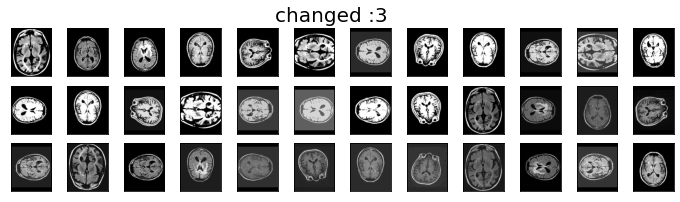

0

In [80]:
contrast()

In [ ]:
# # Separate majority and minority classes
# majority = none
# minority = paths5

In [ ]:
# from sklearn.utils import resample
# df_minority_upsampled = resample(minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=len(majority),    # to match majority class
#                                  random_state=123) 

# SMOTE

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/NonDemented

/content/drive/.shortcut-targets-by-id/1D-9bGWYnEPsV_xxM8FEO0FKU49PX57Bh/NonDemented


In [ ]:
ls > '/content/drive/MyDrive/Colab Notebooks/dementia/nd.txt'

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/lewy body_resized

/content/drive/MyDrive/Colab Notebooks/augmented/lewy body_resized


In [ ]:
ls > '/content/drive/MyDrive/Colab Notebooks/dementia/lb.txt'

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/frontotemporal dementia_a

/content/drive/MyDrive/Colab Notebooks/augmented/frontotemporal dementia_a


In [9]:
ls > '/content/drive/MyDrive/Colab Notebooks/dementia/fd.txt'

In [15]:
def get_im_names_arrays(file_name):
    f = open(f'/content/drive/MyDrive/Colab Notebooks/dementia/{file_name}','r')
    target_array = []
    for line in f:
        target_array.append(line[:-1])
    return target_array


im_names_nd = get_im_names_arrays('nd.txt')
im_names_fd = get_im_names_arrays('fd.txt')
im_names_lb = get_im_names_arrays('lb.txt')

In [8]:
import csv
import cv2
import os

#dementia typy codes: 0 not demented, 1 lewy body dementia

def generate_csv_table(im_names_data, folder_of_images, dem_type, table_name):
    dict_list = []
    fieldnames = []
    for i in range(208):
        for j in range(176):
            fieldnames.append(f'{str(i)}_{str(j)}')
    fieldnames += ['dementia_class']
    for name in im_names_data:
        img = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/dementia/{folder_of_images}/{name}',0)
        row = {}
        row['dementia_class'] = dem_type
        for i in range(208):
            for j in range(176):
                row[f'{str(i)}_{str(j)}'] = int(img[i][j])
        dict_list.append(row)
    with open(table_name + '.csv', 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        if os.stat(table_name + '.csv').st_size == 0:
            writer.writeheader()
        writer.writerows(dict_list)

In [9]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/

/content/drive/MyDrive/Colab Notebooks/dementia


In [10]:
generate_csv_table(im_names_lb, 'lewy body_resized',1 , 'dementia_data')

In [ ]:
#generate_csv_table(im_names_fd, 'frontotemporal dementia_a',2 , 'dementia_data')

In [11]:
generate_csv_table(im_names_nd[:1500], 'NonDemented',0 , 'dementia_data')

In [12]:
generate_csv_table(im_names_nd[1500:], 'NonDemented',0 , 'dementia_data')

In [ ]:
import pandas as pd
df = pd.read_csv('dementia_data.csv')
df#.loc[1,'1_20']

In [14]:
import pandas as pd
df = pd.read_csv('dementia_data.csv')
y = df.dementia_class.values
x = df.drop('dementia_class', axis=1).values

In [6]:
y.shape

(7528,)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

In [8]:
df.dementia_class.value_counts()

2    4128
0    3200
1     200
Name: dementia_class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, Y_smote = sm.fit_resample(x_train, y_train)

NameError: ignored

In [ ]:
print(X_smote.shape) 

NameError: ignored

In [ ]:
X_smote = X_smote.reshape(7401, 208, 176)

ValueError: ignored

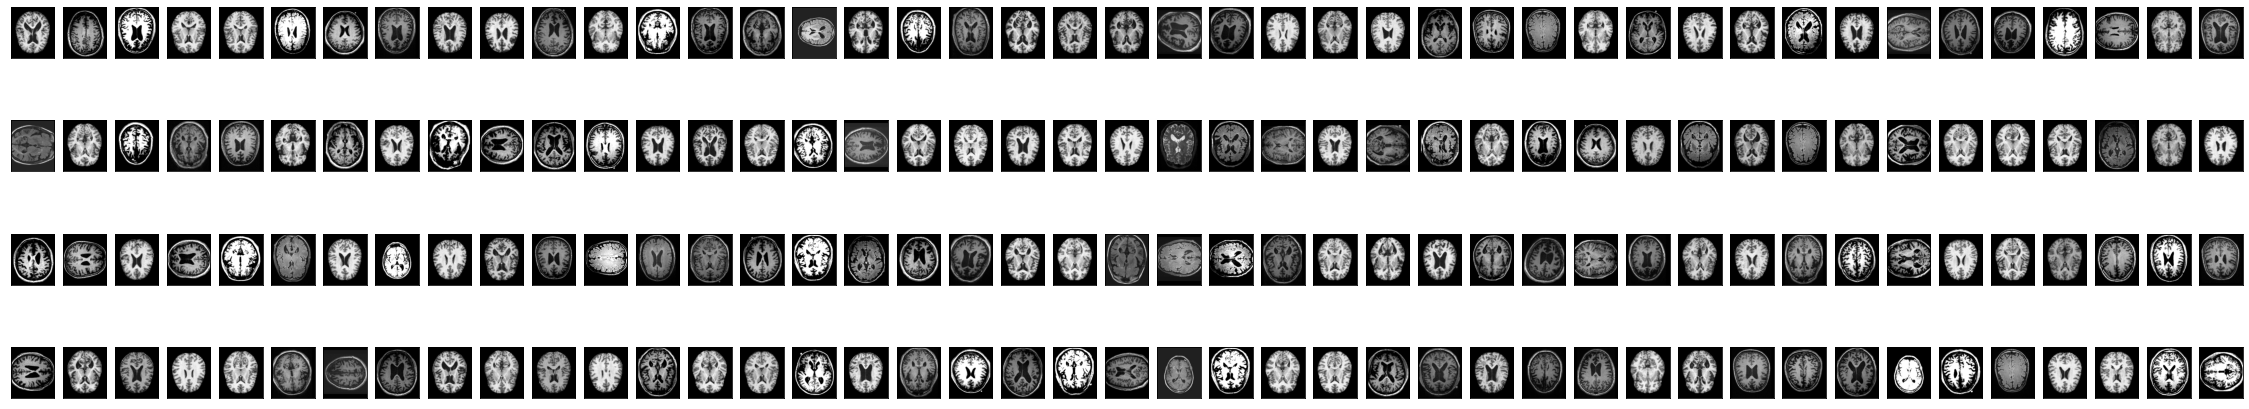

In [ ]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(40,8))
for item in X_smote:
  plt.subplot(4, 43, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)    
  plt.imshow(item, cmap = 'gray')
  i += 1
plt.suptitle("\nSmoted :3", fontsize=20)
plt.show()